<a href="https://colab.research.google.com/github/wanderson42/Portfolio-DS/blob/main/Projeto_de_Redu%C3%A7%C3%A3o_Dimensionalidade_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Science**

# **Projeto de Portfólio:**

<span style='color:Gray'> Implementação do algoritmo PCA para redução de dimensionalidade  </span>

Autor: Wanderson Ferreira
***

Neste notebook, implementou-se um algoritmo PCA do zero (com métodos similares ao Sklearn) e aplicou-se o algoritmimo em dois estudos de caso:

- `Visualização de dados`
- `Diminuição do custo computacional de um modelo de deep learning`

Para realizar as duas tarefas acima, usarei dois conjuntos de dados famosos: *Breast Cancer* (numérico) e *CIFAR - 10* (imagem).
<br>

# 1 - Background teórico


</div>
<left><img src="https://devopedia.org/images/article/139/4543.1548137789.jpg" width="700"/> <center>
</div>

<p><center></center></p>

As etapas envolvidas no PCA são:

**1 -** Obter o conjunto de dados (padronizar as escalas de antemão).

**2 -** Centralizar os dados (subtraindo-se a média dos dados).

**3 -** Computar a matriz de covariância.

**4 -** Calcular os autovetores e autovalores.

**5 -** Escolher os componentes principais.

**6 -** Projetar os autovetores correspondentes as essas componentes principais conforme a distribuição dos dados.

**7 -** Obter a matriz de dados no novo espaço de features com menor dimensão.

**8 -** Calcular o percentual das variância explicada de componentes principais e interpretar os resultados da análise:

***

<br>


# 2 - Implementação


In [ ]:
import numpy as np
class TuringPCA:

    def __init__(self, n_components : int, float = None,
                 sd_solver : str = None):
        self.n_components_ = n_components
        self.sd_solver = sd_solver

    def fit(self, X):
        '''
        Estima-se os parâmetros PCA a partir a partir dos dados das features

        Parâmetros:
        ----------
        X: array, lista de features

        Returns:
        Parâmetros PCA (e.g. componentes principais e variância explicada)
        '''
        # Centralização dos dados
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        X_centr = X - self.mean

        if self.sd_solver == 'auto' or self.sd_solver == None:
           # Decomposição espectral da transposta da matriz de correlação
           corr_mat = np.corrcoef(X_centr.T)
           eig_vals, eig_vecs = np.linalg.eig(corr_mat)
        elif self.sd_solver == 'full':
           # Decomposição da transposta da matriz de covariância
           cov_mat = np.cov(X_centr.T)
           eig_vals, eig_vecs = np.linalg.eig(cov_mat)

        '''
        O trecho de código a seguir faz parte da etapa de normalização dos autovetores encontrados:
        '''
        # Obtêm-se os indices dos autovetores de maior valor absoluto
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)

        # Retorna uma matriz linha com valores 1 ou -1, indicando o sinal dos autovetores com base no índice encontrado
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])

        # Multiplica a matriz linha signs pela matriz dos autovetores de forma que eles fiquem orientados no mesmo sentido.
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        # Essa multiplicação é permitida por meio de um np broadcasting, onde a matriz signs é expandida na forma (1, n_components)

        # Obtêm-se a transposta dessa matriz normalizada
        eig_vecs = eig_vecs.T

        # Cria-se uma lista de (autovalores, autovetores) tuplas
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        # Seleciona apenas as n_components principais com maior autovalor (ordenadas de forma decrescente).
        if self.n_components_ is None:
           self.n_components_ = X.shape[1]
           self.components_ = eig_vecs_sorted[:self.n_components_,:]
        else:
           self.components_ = eig_vecs_sorted[:self.n_components_,:]

        # A proporção da variância total dos dados explicada por cada componente principal:
        # razão entre o autovalor da componente e a soma de todos os autovalores.
        self.explained_variance_ratio_ = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components_]]

        return self

    def transform(self, X):
        '''
        Aplica a redução de dimensionalidade nos dados,
        projetando as componentes principais no novo espaço de features

        Parâmetros:
        ----------
        X: array, lista de features

        Returns:
        Matriz de dados projetados no novo espaço de features
        '''
        X = X.copy()
        # conjunto de dados é centralizado subtraindo-se a média dos dados
        X_centr = X - self.mean
        # Dados centralizados multiplicados pela transposta da matriz de autovetores
        # que foram selecionados como componentes principais no método fit.
        X_proj = X_centr.dot(self.components_.T)
        return X_proj

<br>

#3 - Aplicação do algoritmo TuringPCA



### **3.1 - Compreendendo os dados**

Antes de prosseguir e carregar os dados, é bom entender e examinar os dados com os quais você estará trabalhando!

#### **3.1.1  Breast Cancer Dataset**
</div>
<left><img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*pxFCmhRFTighUn88baLcSA.png" width="700"/>
</div>


O conjunto de dados de Câncer de Mama é um conjunto de dados multivariados com valores reais que consiste em duas classes, em que cada classe significa se um paciente tem câncer de mama ou não. As duas categorias são: maligna e benigna.

A classe maligna possui 212 instâncias, enquanto a classe benigna possui 357 instâncias.

Ele possui um total de 30 features: raio, textura, perímetro, área, suavidade, dimensão fractal, etc.

#### **3.1.2 CIFAR-10 Dataset**

</div>
<left><img src="https://cdn-images-1.medium.com/v2/resize:fit:600/1*r8S5tF_6naagKOnlIcGXoQ.png" width="550"/>
</div>

O conjunto de dados CIFAR-10 (Canadian Institute For Advanced Research) consiste em 60.000 imagens, tendo-se dez classes, com 6000 imagens por categoria.

O conjunto de dados consiste em 50.000 imagens de treinamento e 10.000 imagens de teste.

As classes no conjunto de dados são: avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio, caminhão.

### **3.2 - Exploração dos dados**

Agora irei carregar e explorar rapidamente os conjuntos de dados de câncer de mama e CIFAR-10, com intuito de ter uma melhor ideia sobre a dimensionalidade de ambos os conjuntos de dados.

#### **3.2.1  Breast Cancer Dataset**

Vamos primeiro explorar o conjunto de dados do câncer de mama. Irei importar o conjunto de dados do câncer de mama a partir do `sklearn`.

In [ ]:
import pandas as pd
# Carregando o dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

# Concatenando dados e rótulos
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

# Nomeando colunas
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels


breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Printando as últimas linhas do dataframe:

In [ ]:
breast_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


#### **3.2.2 CIFAR-10 Dataset**

Em seguida, vamos explorará o conjunto de dados de imagens CIFAR - 10. Irei carregar o conjunto de dados CIFAR - 10 usando uma biblioteca de deep learning chamada Keras.

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Vamos descobrir o número total de classes e tipos de dados que nelas possuem:

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Numéro total de classes: ', nClasses)
print('Tipo de classes : ', classes)

Numéro total de classes:  10
Tipo de classes :  [0 1 2 3 4 5 6 7 8 9]


Agora, vamos plotar as imagens do CIFAR-10:

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


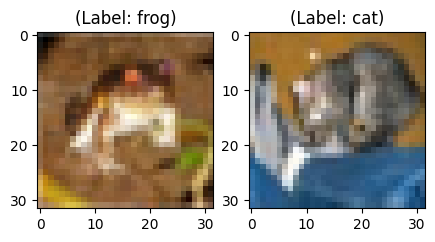

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Para melhor entendimento vamos rotular as classes com nomes apropriados
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Exibindo a primeira imagem do dataset de treino
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Exibindo a primeira imagem do dataset de teste
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


Mesmo que as duas imagens acima estejam borradas, você ainda pode observar de alguma forma que a imagem a esquerda é um sapo, enquanto que a imagem a direita é de um gato.

### **3.3 - Visualização de dados usando a classe TuringPCA**

Agora vem a parte mais interessante deste tutorial. Irei utilizar a classe customizada TuringPCA para transformar os dados de alta dimensão em componentes principais de baixa dimensão.

#### **3.3.1 - Breast Cancer Dataset**

Primeiramente vamos padronizar os dados, pois os resultados do PCA são fortemente influenciados com base na escala das features. Para fazer essa tarefa, irei utilizar o módulo `StandardScale()` do Sklearn:


In [ ]:
from sklearn.preprocessing import StandardScaler
# Padronização de features
scaler = StandardScaler().set_output(transform="pandas")
X = breast_dataset.drop(['label'], axis=1)
X_std = scaler.fit_transform(X)
X_std.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


Agora vem a parte crítica, as próximas linhas de código projetarão os dados de câncer de mama de **30** dimensões em **5** componentes principais.

Irei utilizar o algoritimo customizado TuringPCA, passsando o número de componentes (n_components = 5), por fim, chamará os métodos `fit()` e `transform()` nos dados.

In [ ]:
pca = TuringPCA(n_components=5).fit(X_std)

# Aplica a redução de dimensionalidade em X_std.
X_pca = pca.transform(X_std)

# Converter para dataframe
component_names = [f"PCA_{i+1}" for i in range(X_pca.shape[1])]
X_pca.columns = component_names

X_pca.info()
X_pca.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   569 non-null    float64
 1   PCA_2   569 non-null    float64
 2   PCA_3   569 non-null    float64
 3   PCA_4   569 non-null    float64
 4   PCA_5   569 non-null    float64
dtypes: float64(5)
memory usage: 22.4 KB


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,9.192837,1.948583,-1.123166,-3.633731,1.195110
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086
3,7.122953,10.275589,-3.232790,-0.152547,2.960878
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747


Essa célula oculta a seguir define as funções `plot_variance` e `make_mi_scores`.

In [ ]:
#@title
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", title="% Variância Explicada", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", title="% Variância Acumulada", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

**Scores de variância**

Depois de obter os componentes principais, podemos invocar o atributo `explained_variance_ratio_` da classe TuringPCA, com isto, podemos calcular:

- A proporção da variância total dos dados explicada que cada componente principal contém após projetar os dados em um subespaço de dimensão inferior.
- Com `np.cumsum()`, obter a proporção acumulada da variância explicada pelos componentes principais. Esse valor pode ser útil para selecionar o número apropriado de componentes principais a serem mantidos na redução de dimensionalidade.

Essas duas informações gráficadas a seguir por meio da função customizada `plot_variance()`:



array([<Axes: title={'center': '% Variância Explicada'}, xlabel='Componente'>,
       <Axes: title={'center': '% Variância Acumulada'}, xlabel='Componente'>],
      dtype=object)

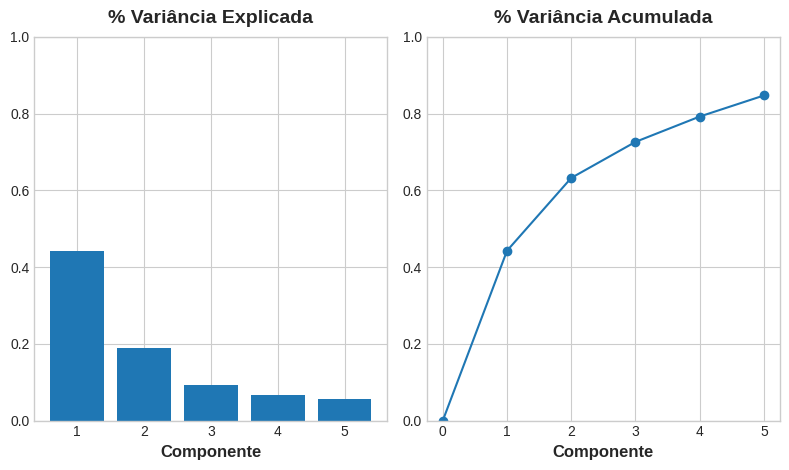

In [ ]:
# Look at explained variance
plot_variance(pca)

**Feature Importance**

Embora o PCA não seja uma técnica de seleção de características, pois não considera diretamente a importância individual de cada feature. É possível utilizar a variância explicada pelos componentes principais como uma medida indireta da importância das features. Conforme se segue:

In [ ]:
features = list(X.columns)
# Criando o dataframe dos loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transposta da matriz de loadings
    columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)],  # nomeando as colunas
    index=features,  # nomeando o índice com o nome das features
)

loadings.head()

,PC1,PC2,PC3,PC4,PC5
mean radius,0.218902,-0.233857,-0.008531,-0.041409,-0.037786
mean texture,0.103725,-0.059706,0.064550,0.603050,0.049469
mean perimeter,0.227537,-0.215181,-0.009314,-0.041983,-0.037375
mean area,0.220995,-0.231077,0.028700,-0.053434,-0.010331
mean smoothness,0.142590,0.186113,-0.104292,-0.159383,0.365089


</div>
<left><img src="http://alexhwilliams.info/itsneuronalblog/img/pca/rank_one.png" width="700"/> <center>
</div>

<p><center></center></p>





As features com maiores cargas (loadings) nas componentes principais explicam a maior parte da variância total e podem ser consideradas as mais importantes.





In [ ]:
# Selecionando as features mais importantes
important_features = loadings.iloc[:, 0].abs().sort_values(ascending=False).index

# Criando o dataframe das features importantes com os valores absolutos
important_features_df = pd.DataFrame({'feature': important_features,
                                      'importance': loadings.iloc[:, 0].abs().sort_values(ascending=False).values})

print(important_features_df)

                    feature  importance
0       mean concave points    0.260854
1            mean concavity    0.258400
2      worst concave points    0.250886
3          mean compactness    0.239285
4           worst perimeter    0.236640
5           worst concavity    0.228768
6              worst radius    0.227997
7            mean perimeter    0.227537
8                worst area    0.224871
9                 mean area    0.220995
10              mean radius    0.218902
11          perimeter error    0.211326
12        worst compactness    0.210096
13             radius error    0.205979
14               area error    0.202870
15     concave points error    0.183417
16        compactness error    0.170393
17          concavity error    0.153590
18          mean smoothness    0.142590
19            mean symmetry    0.138167
20  worst fractal dimension    0.131784
21         worst smoothness    0.127953
22           worst symmetry    0.122905
23            worst texture    0.104469


**Informação Mutúa**

No contexto de regressão, a informação mútua pode ser usada para avaliar a relevância de cada feature para prever o target. A função mutual_info_regression do Sklearn usa uma estimativa não paramétrica da entropia para calcular a informação mútua entre cada feature e o alvo. Vamos utiliza-la a partir da função customizada `make_mi_scores`:

In [ ]:
y = breast_dataset['label']
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
print("\033[1m====TuringPCA====\n")
mi_scores

====TuringPCA====



PCA_1    0.443977
PCA_2    0.086674
PCA_3    0.053770
PCA_4    0.014002
PCA_5    0.000000
Name: MI Scores, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
sk_pca = PCA(n_components=5).fit(X_std); X_sk_pca = sk_pca.transform(X_std);
component_names = [f"PCA_{i+1}" for i in range(X_sk_pca.shape[1])];
X_sk_pca = pd.DataFrame(X_sk_pca, columns = component_names); y = breast_dataset['label'];
mi_scores = make_mi_scores(X_sk_pca, y, discrete_features=False);
print("\033[1m====SklearnPCA====\n")
mi_scores

====SklearnPCA====



PCA_1    0.443977
PCA_2    0.086674
PCA_3    0.053770
PCA_4    0.014002
PCA_5    0.000000
Name: MI Scores, dtype: float64

**Linearidade entre PCA_1 e PCA_2**

Agora vamos plotar a visualização das 569 amostras ao longo do eixo do componente principal 1 e do componente principal 2. Isso deve dar a você uma boa ideia de como suas amostras estão distribuídas entre as duas classes.

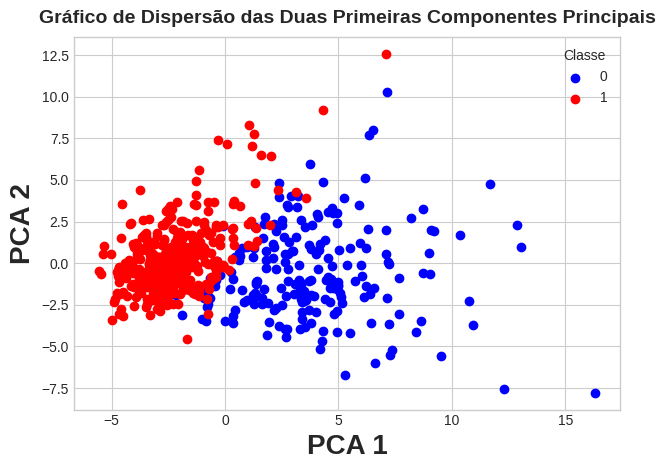

<Figure size 1000x1000 with 0 Axes>

In [ ]:
'''
Criando o gráfico de dispersão
'''

# Definindo as cores para cada classe
colors = ['blue', 'red']


# Criando um plot
fig, ax = plt.subplots()

# Loop para plotar cada classe
for i, color in enumerate(colors):
    ax.scatter(X_pca.loc[y == i, 'PCA_1'],
               X_pca.loc[y == i, 'PCA_2'],
               c=color, label=i)

# Definindo o título e as legendas do plot
ax.set_title('Gráfico de Dispersão das Duas Primeiras Componentes Principais')
ax.legend(title='Classe')
ax.set_xlabel('PCA 1',fontsize=20)
ax.set_ylabel('PCA 2',fontsize=20)

# Exibindo o plot
fig = plt.figure(figsize=(10, 10))
plt.show()



#### **3.3.2 CIFAR-10 Dataset**

As seguintes linhas de código para visualizar os dados CIFAR-10 são bastante semelhantes à visualização PCA dos dados de câncer de mama.

- Vamos verificar rapidamente os valores máximos e mínimos das imagens de treinamento CIFAR-10 e normalizar os pixels entre 0 e 1 inclusive.


In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
x_train = x_train/255.0
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

Em seguida, irei criar um pandas DataFrame que conterá os valores de pixel das imagens juntamente com seus respectivos valores de classe. Mas antes disso, irei achatar a imagem usando o método reshape(-1,3072), para transformar a matriz de pixels 32x32x3 em um vetor unidimensional de 3072 valores. Uma vez que esse procedimento é útil quando se deseja usar uma rede neural para classificar as imagens, já que muitas vezes a entrada da rede é um vetor unidimensional.

In [ ]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


Perfeito! O tamanho do dataframe está correto, já que há 50.000 imagens de treinamento, cada uma com 3072 pixels e uma coluna adicional para as classes (target), totalizando 3073.



In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


Agora irei aplicar a minha classe TuringPCA em todas as colunas, exceto na última, que é variável target de cada imagem. E por completeza vamos visualizar a quantidade de variância das componentes principais

In [ ]:
pca_cifar = TuringPCA(n_components=2).fit(df_cifar.iloc[:,:-1])

# Aplica a redução de dimensionalidade
principalComponents_cifar = pca_cifar.transform(df_cifar.iloc[:,:-1])

In [ ]:
print('\033[Proporção da variância acumulada por cada componente: {}'.format(pca_cifar.explained_variance_ratio_))

roporção da variância acumulada por cada componente: [0.26920196736521773, 0.11370503556851955]


In [ ]:
# Converter para dataframe
component_names = [f"PCA_{i+1}" for i in range(principalComponents_cifar.shape[1])]
principalComponents_cifar.columns = component_names
principalComponents_cifar['y'] = y_train

principalComponents_cifar.info()
principalComponents_cifar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   50000 non-null  float64
 1   PCA_2   50000 non-null  float64
 2   y       50000 non-null  uint8  
dtypes: float64(2), uint8(1)
memory usage: 830.2 KB


,PCA_1,PCA_2,y
0,-5.893729,3.367415,6
1,0.937358,-1.233530,9
2,6.133929,-12.202802,9
3,-10.163738,1.133866,4
4,-3.509282,-4.212626,1




É hora de visualizar os dados do CIFAR-10 em um espaço bidimensional.

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

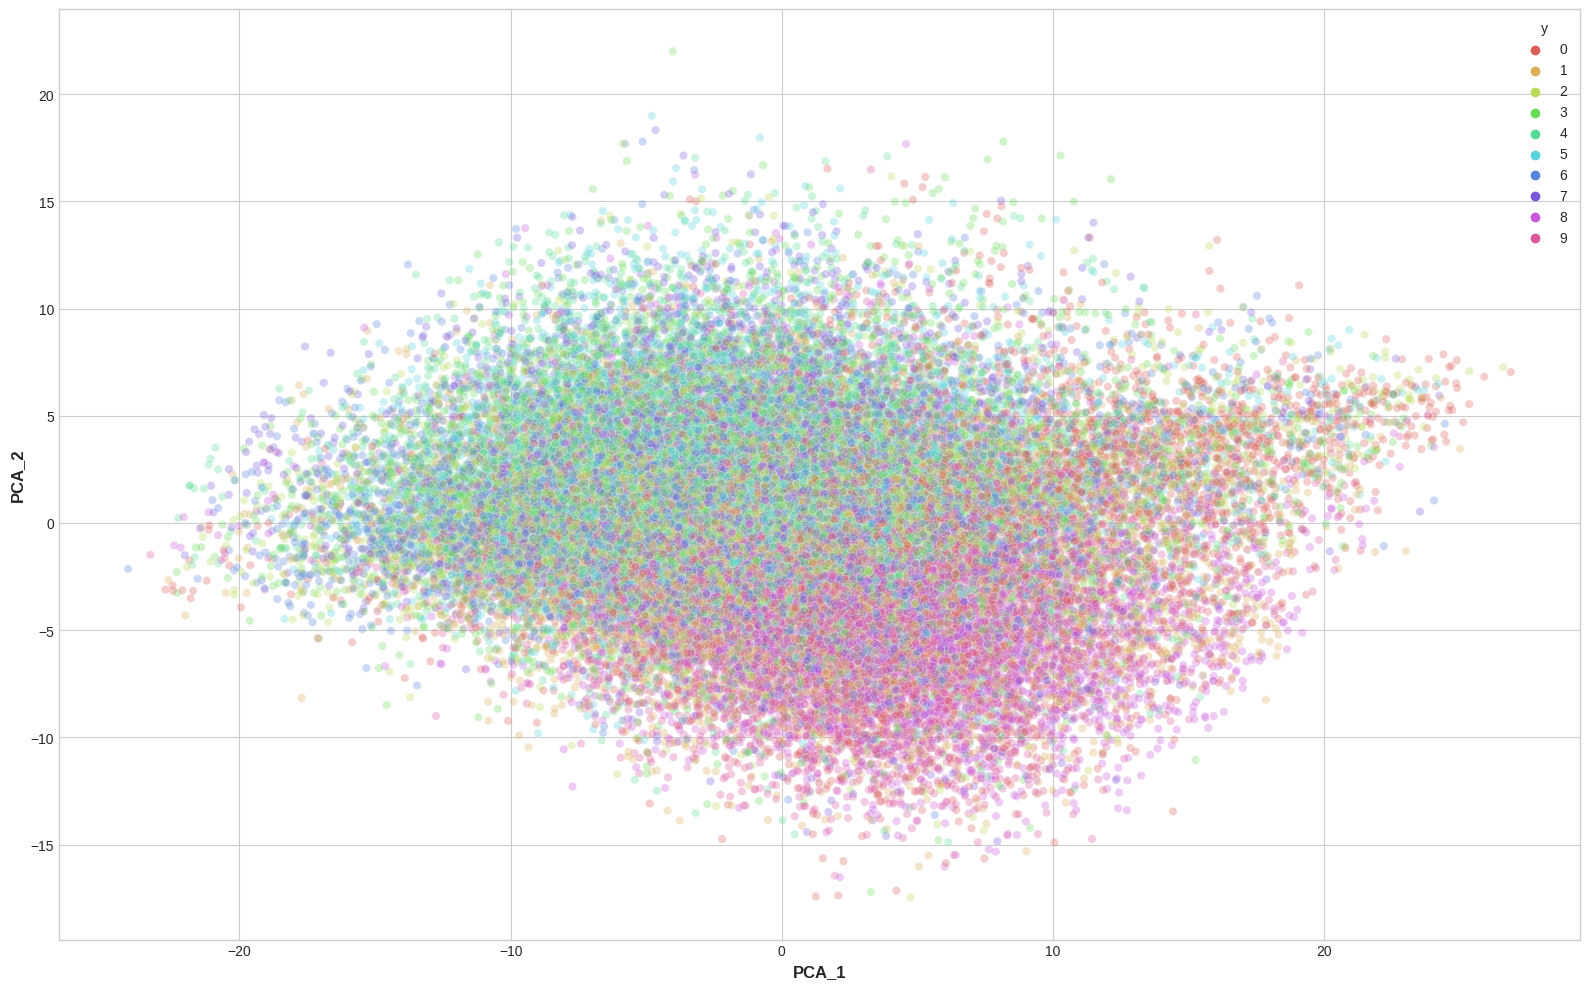

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA_1", y="PCA_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principalComponents_cifar,
    legend="full",
    alpha=0.3
)



### **3.4 - Diminuir o custo computacional de uma rede neural usando a classe TuringPCA**

Nesta estapa, vamos acelerar o processo de treinamento de um modelo de deep learning usando a classe TuringPCA.

#### **3.3.1 - CIFAR - 10 Dataset**


Primeiro, vamos normalizar os dados de treinamento e teste, referentes as imagens.

In [ ]:
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)

A seguir, instânciar o modelo TuringPCA, utilizando 100 componentes principais, isto é a dimensão será reduzida de 3072 dimensões reais para 100 componentes principais.

In [ ]:
pca_cifar_100 = TuringPCA(n_components=100).fit(x_train_flat)

Por fim, irei aplica o método `transform()` da minha classe TuringPCA no conjunto de treinamento e teste para reduzir a dimensionalidade.

In [ ]:
# Aplica a redução de dimensionalidade
train_img_pca = pca_cifar_100.transform(x_train_flat)
test_img_pca = pca_cifar_100.transform(x_test_flat)

Em seguida, vamos importar as bibliotecas necessárias para modelarmos uma rede neural.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Definindo alguns hiperparâmetros do modelo: epochs, num_classes e batch_size.



In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

Agora irei construir uma rede neural camada por camada de forma sequencial:

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Printando um resumo do modelo:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              103424    
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,811,722
Trainable params: 1,811,722
Non-trainable params: 0
_________________________________________________________________


Finalmente, é hora de compilar e treinar o modelo!

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 25s 62ms/step - loss: 1.6376 - accuracy: 0.4191 - val_loss: 1.4659 - val_accuracy: 0.4719
Epoch 2/20
391/391 [==============================] - 23s 60ms/step - loss: 1.3241 - accuracy: 0.5313 - val_loss: 1.3237 - val_accuracy: 0.5267
Epoch 3/20
391/391 [==============================] - 22s 57ms/step - loss: 1.1409 - accuracy: 0.5952 - val_loss: 1.3091 - val_accuracy: 0.5319
Epoch 4/20
391/391 [==============================] - 24s 61ms/step - loss: 0.9889 - accuracy: 0.6465 - val_loss: 1.3247 - val_accuracy: 0.5599
Epoch 5/20
391/391 [==============================] - 24s 62ms/step - loss: 0.8366 - accuracy: 0.6970 - val_loss: 1.4128 - val_accuracy: 0.5542
Epoch 6/20
391/391 [==============================] - 23s 59ms/step - loss: 0.6955 - accuracy: 0.7509 - val_loss: 1.5374 - val_accuracy: 0.5574
Epoch 7/20
391/391 [==============================] - 27s 68ms/step - loss: 0.5720 - accuracy: 0.7954 - val_loss: 1.6057 - val_accuracy:

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 53s 130ms/step - loss: 2.1638 - accuracy: 0.2431 - val_loss: 1.8525 - val_accuracy: 0.3179
Epoch 2/20
391/391 [==============================] - 45s 115ms/step - loss: 1.8358 - accuracy: 0.3361 - val_loss: 1.9091 - val_accuracy: 0.3021
Epoch 3/20
391/391 [==============================] - 47s 121ms/step - loss: 1.7415 - accuracy: 0.3727 - val_loss: 1.7508 - val_accuracy: 0.3808
Epoch 4/20
391/391 [==============================] - 46s 118ms/step - loss: 1.6663 - accuracy: 0.4053 - val_loss: 1.7024 - val_accuracy: 0.3946
Epoch 5/20
391/391 [==============================] - 46s 118ms/step - loss: 1.6078 - accuracy: 0.4238 - val_loss: 1.5931 - val_accuracy: 0.4302
Epoch 6/20
391/391 [==============================] - 47s 121ms/step - loss: 1.5666 - accuracy: 0.4418 - val_loss: 1.6171 - val_accuracy: 0.4164
Epoch 7/20
391/391 [==============================] - 46s 117ms/step - loss: 1.5222 - accuracy: 0.4592 - val_loss: 1.5601 - val_ac